The model's main purpose is to predict the 10-year risk of Coronary Heart Disease (CHD). CHD is a disease of the blood vessels supplying the heart. Heart disease has been the leading cause of death worldwide since 1921. In 2008, 7.3 million people died from CHD. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Sex: male or female(0=female, 1=male) Age: Age of the patient education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4) Current Smoker: whether or not the patient is a current smoker (0=No, 1=Yes) Cigs Per Day: the number of cigarettes that the person smoked on average in one day BP Meds: whether or not the patient was on blood pressure medication Prevalent Stroke: whether or not the patient had previously had a stroke (0=No, 1=Yes) Prevalent Hyp: whether or not the patient was hypertensive (0=No, 1=Yes) Diabetes: whether or not the patient had diabetes (0=No, 1=Yes) Tot Chol: total cholesterol level Sys BP: systolic blood pressure Dia BP: diastolic blood pressure BMI: Body Mass Index Heart Rate: heart rate Glucose: glucose level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df = df.dropna(subset=['glucose'])

In [12]:
removing_na= ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate']
for i in removing_na:
    df[i] = df[i].fillna(df[i].mean())

In [13]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3258
1     594
Name: count, dtype: int64

In [15]:
df_minority= df[df['TenYearCHD']==1]
df_majority= df[df['TenYearCHD']==0]

In [16]:
from sklearn.utils import resample

df_up_sampled = resample(df_minority, n_samples=(3258), random_state=123456)
df_up_sampled

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
369,0,67,1.0,0,0.0,0.0,0,1,0,248.0,215.0,105.0,22.91,90.0,97.0,1
3581,0,40,1.0,1,5.0,0.0,0,0,0,209.0,130.0,84.5,39.94,77.0,104.0,1
266,1,45,1.0,1,9.0,0.0,0,1,0,265.0,156.5,86.0,24.15,75.0,76.0,1
4100,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1
1091,1,47,1.0,1,30.0,0.0,0,0,0,210.0,112.0,66.0,24.58,70.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0,53,2.0,0,0.0,0.0,0,1,0,219.0,184.0,109.0,22.73,80.0,73.0,1
2075,0,37,1.0,1,20.0,0.0,0,0,0,166.0,112.0,73.5,21.64,75.0,93.0,1
1089,0,40,1.0,1,9.0,0.0,0,0,0,239.0,118.0,78.0,23.48,85.0,75.0,1
1203,1,64,1.0,1,30.0,0.0,0,1,0,253.0,178.0,106.0,24.68,100.0,76.0,1


In [17]:
df_balanced = pd.concat([df_up_sampled, df_majority])
df_balanced

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
369,0,67,1.0,0,0.0,0.000000,0,1,0,248.0,215.0,105.0,22.91,90.0,97.0,1
3581,0,40,1.0,1,5.0,0.000000,0,0,0,209.0,130.0,84.5,39.94,77.0,104.0,1
266,1,45,1.0,1,9.0,0.000000,0,1,0,265.0,156.5,86.0,24.15,75.0,76.0,1
4100,1,69,1.0,1,1.0,0.000000,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1
1091,1,47,1.0,1,30.0,0.000000,0,0,0,210.0,112.0,66.0,24.58,70.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.000000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.029992,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [18]:
df= df_balanced

In [19]:
df['TenYearCHD'].value_counts()

TenYearCHD
1    3258
0    3258
Name: count, dtype: int64

In [20]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.032051,0.046651,0.227456,0.328379,-0.081621,-0.004061,-0.032864,0.019927,-0.078357,-0.056081,0.046146,0.041017,-0.090036,0.013388,0.128338
age,-0.032051,1.000000,-0.170269,-0.216179,-0.185904,0.119502,0.093726,0.330282,0.091009,0.180815,0.397785,0.179598,0.120230,-0.013451,0.119246,0.322777
education,0.046651,-0.170269,1.000000,0.028576,0.032448,-0.013232,-0.057572,-0.077899,-0.062733,0.020429,-0.117787,-0.029930,-0.110194,-0.045797,-0.040236,-0.105353
currentSmoker,0.227456,-0.216179,0.028576,1.000000,0.777301,-0.085526,-0.051208,-0.149562,-0.064763,-0.050045,-0.154468,-0.120531,-0.145324,0.068551,-0.064724,0.024248
cigsPerDay,0.328379,-0.185904,0.032448,0.777301,1.000000,-0.082179,-0.046778,-0.109723,-0.050853,-0.028045,-0.116372,-0.083759,-0.098272,0.088082,-0.052635,0.069740
BPMeds,-0.081621,0.119502,-0.013232,-0.085526,-0.082179,1.000000,0.047356,0.255652,0.095015,0.091361,0.292936,0.216845,0.052090,0.023854,0.082873,0.084357
prevalentStroke,-0.004061,0.093726,-0.057572,-0.051208,-0.046778,0.047356,1.000000,0.080829,-0.003165,-0.003852,0.048072,0.029706,0.008398,-0.018338,0.012485,0.054629
prevalentHyp,-0.032864,0.330282,-0.077899,-0.149562,-0.109723,0.255652,0.080829,1.000000,0.091378,0.144460,0.699957,0.603642,0.295630,0.120039,0.100984,0.233687
diabetes,0.019927,0.091009,-0.062733,-0.064763,-0.050853,0.095015,-0.003165,0.091378,1.000000,0.054302,0.116875,0.048642,0.106645,0.079171,0.705657,0.098192
totChol,-0.078357,0.180815,0.020429,-0.050045,-0.028045,0.091361,-0.003852,0.144460,0.054302,1.000000,0.189881,0.144849,0.101795,0.076829,0.058381,0.120522


In [21]:
df.drop(['currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke','diabetes','heartRate'], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 369 to 4239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          6516 non-null   int64  
 1   age           6516 non-null   int64  
 2   education     6516 non-null   float64
 3   prevalentHyp  6516 non-null   int64  
 4   totChol       6516 non-null   float64
 5   sysBP         6516 non-null   float64
 6   diaBP         6516 non-null   float64
 7   BMI           6516 non-null   float64
 8   glucose       6516 non-null   float64
 9   TenYearCHD    6516 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 560.0 KB


<Axes: >

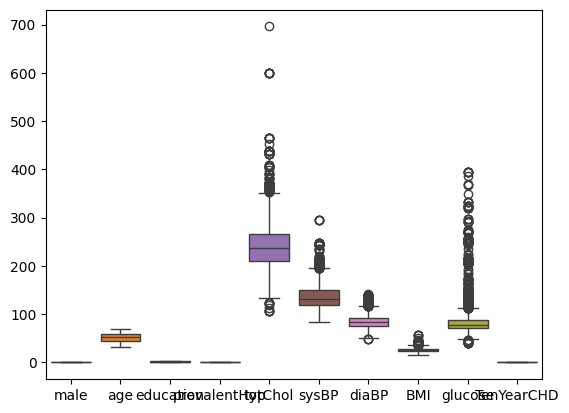

In [24]:
sns.boxplot(df)

In [25]:
from sklearn.preprocessing import StandardScaler

#create an object of standard scaler
scaler = StandardScaler()

#fit the data inot the scaler object
# fit mehthod requires a 2d collection (DF)
scaler.fit(df)

StandardScaler()

In [26]:
array_scaled = scaler.transform(df)
array_scaled

array([[-0.97573926,  1.7828959 , -0.89643595, ..., -0.76376179,
         0.42572747,  1.        ],
       [-0.97573926, -1.33656907, -0.89643595, ...,  3.23096974,
         0.66091527,  1.        ],
       [ 1.02486396, -0.75889037, -0.89643595, ..., -0.47289467,
        -0.27983595,  1.        ],
       ...,
       [-0.97573926,  0.04985981,  0.10102231, ..., -1.10154297,
         0.76171005, -1.        ],
       [ 1.02486396, -1.33656907,  1.09848056, ..., -0.13276779,
        -0.41422898, -1.        ],
       [-0.97573926, -1.45210481,  1.09848056, ..., -1.23290231,
        -0.14544292, -1.        ]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6516 entries, 369 to 4239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   male          6516 non-null   int64  
 1   age           6516 non-null   int64  
 2   education     6516 non-null   float64
 3   prevalentHyp  6516 non-null   int64  
 4   totChol       6516 non-null   float64
 5   sysBP         6516 non-null   float64
 6   diaBP         6516 non-null   float64
 7   BMI           6516 non-null   float64
 8   glucose       6516 non-null   float64
 9   TenYearCHD    6516 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 560.0 KB


In [28]:
df_scaled = pd.DataFrame(array_scaled, columns=["male", "age","education","prevalentHyp","totChol","sysBP","diaBP","BMI","glucose","TenYearCHD"])
df_scaled

,male,age,education,prevalentHyp,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,-0.975739,1.782896,-0.896436,1.248320,0.153392,3.139414,1.571423,-0.763762,0.425727,1.0
1,-0.975739,-1.336569,-0.896436,-0.801076,-0.682898,-0.285354,-0.001289,3.230970,0.660915,1.0
2,1.024864,-0.758890,-0.896436,1.248320,0.517928,0.782368,0.113787,-0.472895,-0.279836,1.0
3,1.024864,2.013967,-0.896436,-0.801076,0.089062,-0.567394,-0.576672,0.097111,-0.111845,1.0
4,1.024864,-0.527819,-0.896436,-0.801076,-0.661455,-1.010599,-1.420566,-0.372029,-0.011050,1.0
...,...,...,...,...,...,...,...,...,...,...
6511,1.024864,-0.065676,1.098481,-0.801076,-0.725785,-0.426374,-0.346519,-1.514387,-0.548622,-1.0
6512,-0.975739,-0.412283,0.101022,-0.801076,0.153392,-0.245063,-0.960260,-0.977221,0.056147,-1.0
6513,-0.975739,0.049860,0.101022,-0.801076,0.603701,-0.144334,-0.116366,-1.101543,0.761710,-1.0
6514,1.024864,-1.336569,1.098481,1.248320,-1.197538,0.157851,1.034399,-0.132768,-0.414229,-1.0


<Axes: >

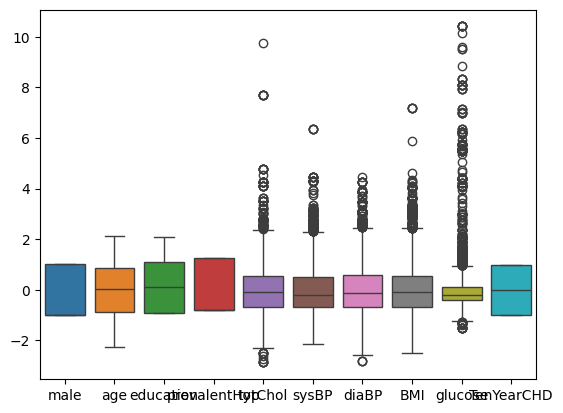

In [29]:
sns.boxplot(df_scaled)

In [30]:
#split the data into x and y
x = df_scaled.drop('TenYearCHD',axis=1)
y=df_scaled['TenYearCHD']

In [31]:
from sklearn.model_selection import train_test_split

# split the data into train and test data sets
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7, random_state=123456)

In [32]:
x_train

,male,age,education,prevalentHyp,totChol,sysBP,diaBP,BMI,glucose
190,-0.975739,0.627539,2.095939,1.248320,1.868858,1.769507,2.146806,0.207359,0.324933
6274,-0.975739,-0.065676,1.098481,1.248320,0.732361,0.520474,1.111117,-0.702774,-0.649417
439,1.024864,0.049860,-0.896436,-0.801076,-0.339805,-0.446520,-0.730107,-0.934998,0.526522
5541,1.024864,0.743074,-0.896436,1.248320,0.003288,0.621202,1.571423,-0.231287,0.022548
6081,1.024864,-0.412283,2.095939,-0.801076,-1.004548,-0.104043,0.459017,-0.114002,-0.414229
...,...,...,...,...,...,...,...,...,...
171,-0.975739,0.974146,0.101022,1.248320,1.997518,-0.204771,0.727529,-0.184373,0.459326
3640,-0.975739,-0.643355,1.098481,-0.801076,-0.489908,-0.869579,-1.727437,-0.630057,-0.246238
3121,1.024864,-0.065676,0.101022,1.248320,1.054011,1.245719,1.417988,0.690574,-0.683015
4594,-0.975739,1.436289,0.078443,1.248320,-0.489908,1.930672,0.996041,-1.019443,-0.179041
